In [6]:
import sys
print('python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('scipy: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

python: 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
scipy: 1.2.0
numpy: 1.16.1
matplotlib: 3.0.3
scipy: 0.25.0
sklearn: 0.20.2


In [3]:
import requests
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection 
from sklearn.ensemble import VotingClassifier

In [11]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width','petal-width','class']

In [12]:
dataset =pd.read_csv(url,names=names)

In [13]:
print(dataset.shape)

(150, 4)


In [19]:
print(dataset.head())

     sepal-length  sepal-width  petal-width        class
5.1           3.5          1.4          0.2  Iris-setosa
4.9           3.0          1.4          0.2  Iris-setosa
4.7           3.2          1.3          0.2  Iris-setosa
4.6           3.1          1.5          0.2  Iris-setosa
5.0           3.6          1.4          0.2  Iris-setosa


In [20]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [21]:
print(dataset.describe())

       sepal-length  sepal-width  petal-width
count    150.000000   150.000000   150.000000
mean       3.054000     3.758667     1.198667
std        0.433594     1.764420     0.763161
min        2.000000     1.000000     0.100000
25%        2.800000     1.600000     0.300000
50%        3.000000     4.350000     1.300000
75%        3.300000     5.100000     1.800000
max        4.400000     6.900000     2.500000


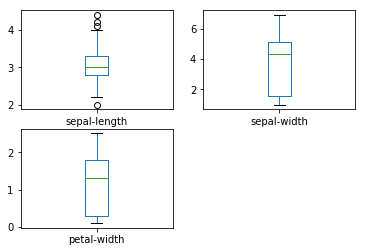

In [22]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

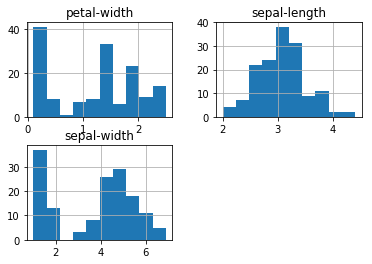

In [23]:
dataset.hist()
pyplot.show()

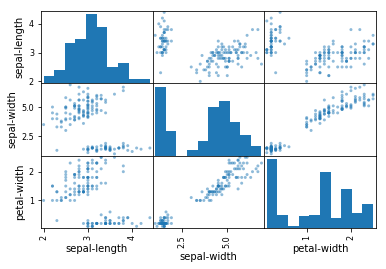

In [24]:
scatter_matrix(dataset)
pyplot.show()


In [45]:
#creating validation dataset and splitting dataset
array=dataset.values
x=array[:,0:3]
y=array[:,3]
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.2,random_state=1)

In [46]:
#logistic regression,linear discrininant regression,knn,trees,gnb,svm
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))


In [47]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR: 0.925140 (0.056964)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.957191 (0.043263)
SVM: 0.964883 (0.043352)


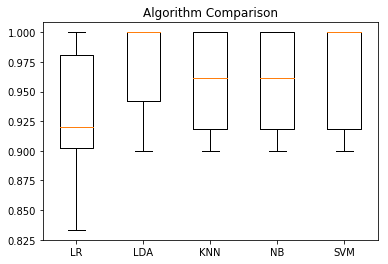

In [48]:
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [49]:
model=SVC(gamma='auto')
model.fit(x_train,y_train)
predictions=model.predict(x_validation)

In [50]:
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

